<a href="https://colab.research.google.com/github/Captaingreenbeard/DataAnalyticsLab_SEM7/blob/main/lab5_DA_KaggleCompetetion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#broiler plate code
from tensorflow.keras import losses, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from tensorflow.keras.layers import (Convolution2D, Dense, Dropout, GlobalAveragePooling2D, 
                              GlobalMaxPool2D, Input, MaxPool2D, concatenate, Activation,  
                              MaxPooling2D,Flatten,BatchNormalization, Conv2D,AveragePooling2D)
from tensorflow.keras.utils import Sequence, to_categorical
from sklearn.datasets import load_iris 
from sklearn.datasets import make_moons 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import OrdinalEncoder
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [34]:
data = pd.read_csv("train.csv")

In [35]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [36]:
is_null = pd.isnull(data).sum()
print('The number of empty values by column:')
print(is_null)

The number of empty values by column:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survived         0
dtype: int64


In [ ]:
#removed the cabin column
data.drop('Cabin',axis=1,inplace=True)

In [37]:
data['Age'].fillna(value=data['Age'].mean(),inplace=True)

In [38]:
is_null = pd.isnull(data).sum()
print('The number of empty values by column:')
print(is_null)

The number of empty values by column:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Survived       0
dtype: int64


In [39]:
data['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [40]:
data['Embarked'].fillna(value='S',inplace=True)

In [41]:
is_null = pd.isnull(data).sum()
print('The number of empty values by column:')
print(is_null)

The number of empty values by column:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64


In [80]:
#experimenting with cleaning the test dataset
is_null = pd.isnull(X_test).sum()
print('The number of empty values by column:')
print(is_null)

The number of empty values by column:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [73]:
X_test['Age'].fillna(value=X_test['Age'].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [79]:
X_test['Fare'].fillna(value=X_test['Fare'].mean(),inplace=True)

CLEANING COMPLETED

In [42]:
data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [ ]:
# we may want to remove the embarked part too

In [44]:
Selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked']
X_train = data[Selected_features]
y_train = data['Survived']

In [56]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [48]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

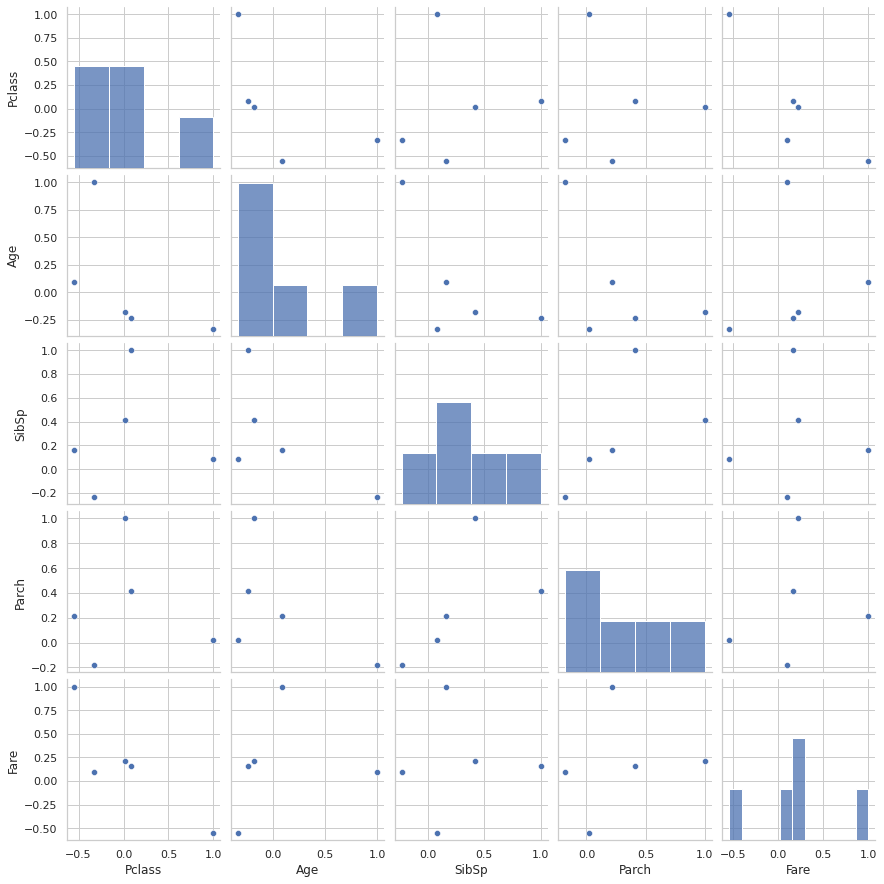

In [49]:
sns.pairplot(data[Selected_features].corr())

plt.show()

In [64]:
#loading test data
X_test_holder = pd.read_csv("test.csv")
X_test = X_test_holder[Selected_features]
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [65]:
#encoding stuff for givings as an input tot the model
enc = OrdinalEncoder()
enc.fit(X_train[["Sex","Embarked"]])
X_train[["Sex","Embarked"]] = enc.transform(X_train[["Sex","Embarked"]])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [66]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,7.2500,2.0
1,1,0.0,38.0,1,0,71.2833,0.0
2,3,0.0,26.0,0,0,7.9250,2.0
3,1,0.0,35.0,1,0,53.1000,2.0
4,3,1.0,35.0,0,0,8.0500,2.0


In [69]:
#encoding the test dataset
enc = OrdinalEncoder()
enc.fit(X_test[["Sex","Embarked"]])
X_test[["Sex","Embarked"]] = enc.transform(X_test[["Sex","Embarked"]])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [70]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,34.5,0,0,7.8292,1.0
1,3,0.0,47.0,1,0,7.0000,2.0
2,2,1.0,62.0,0,0,9.6875,1.0
3,3,1.0,27.0,0,0,8.6625,2.0
4,3,0.0,22.0,1,1,12.2875,2.0


In [145]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=10000)
clf = clf.fit(X_train, y_train)
moonsY_pred = clf.predict(X_test)

trainPred = clf.predict(X_train)
log_regr_score1 = clf.score(X_train, y_train)
print('log_regr_score Train: ',log_regr_score1)

log_regr_score Train:  0.8002244668911336


In [115]:
PassengerId_df = pd.DataFrame(X_test_holder, columns = ['PassengerId'])
PassengerId_df.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [116]:
output_df = pd.DataFrame(moonsY_pred)

In [117]:
#output = df[data.PassengerId,moonsY_pred]
#output = pd.concat([data.PassengerId, moonsY_pred], join = 'outer', axis = 1)
output = pd.concat([PassengerId_df,output_df], axis=1)

In [118]:
output.columns

Index(['PassengerId', 0], dtype='object')

In [119]:
output.rename(columns = {0:'Survived'}, inplace = True)

In [120]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [139]:
output.to_csv('output_LogisticRegg.csv')

In [144]:
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
moonsY_pred_GaussNB = clf.predict(X_test)

trainPred = clf.predict(X_train)
GaussianNB_score = clf.score(X_train, y_train)
print('GaussianNB_score Train: ',GaussianNB_score)

GaussianNB_score Train:  0.792368125701459


In [122]:
output_df_GNB = pd.DataFrame(moonsY_pred_GaussNB)
output_GNB = pd.concat([PassengerId_df,output_df], axis=1)

In [123]:
output_GNB.columns

Index(['PassengerId', 0], dtype='object')

In [124]:
output_GNB.rename(columns = {0:'Survived'}, inplace = True)

In [125]:
output_GNB.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [126]:
output_GNB.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [138]:
output_GNB.to_csv('output_GNB.csv')

In [143]:
clf = SVC(gamma='auto')
clf = clf.fit(X_train, y_train)
moonsY_pred_SVC = clf.predict(X_test)

trainPred = clf.predict(X_train)
SVC_score = clf.score(X_train, y_train)
print('SVC_score Train: ',SVC_score)

SVC_score Train:  0.8933782267115601


In [129]:
output_df_SVC = pd.DataFrame(moonsY_pred_SVC)
output_SVC = pd.concat([PassengerId_df,output_df], axis=1)

In [130]:
output_SVC.columns

Index(['PassengerId', 0], dtype='object')

In [131]:
output_SVC.rename(columns = {0:'Survived'}, inplace = True)

In [132]:
output_SVC.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [133]:
output_SVC.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [137]:
output_SVC.to_csv('file1.csv')